In [ ]:
##Goal: Use previous and current polling data to see how strong
##The relationship between pre-election polling data and the actual
##Result of the presidential election
##Can also look at how good the polls are at predicting outcomes on an
#Election-by-election basis

#Further analysis could look at state polling



In [14]:
#load in data file
electionData = open("election.txt")

#Lists used later
pollWinner = []
actualWinner = []
pollLoser = []
actualLoser = []

#separate data into respective lists
for line in electionData:
    pollWinner.append(line.strip()[5:8])
    actualWinner.append(line.strip()[9:13])
    pollLoser.append(line.strip()[14:17])
    actualLoser.append(line.strip()[18:22])
    
#deletes the column header from the lists
del pollWinner[0]
del actualWinner[0]
del pollLoser[0]
del actualLoser[0]

#converts the strings in the lists to floats
for x in range(len(pollWinner)):
    pollWinner[x] = float(pollWinner[x])
    actualWinner[x] = float(actualWinner[x])
    pollLoser[x] = float(pollLoser[x])
    actualLoser[x] = float(actualLoser[x])

In [15]:
#output file that will store the results of the main analysis
fout = open('results_file.txt','w')

In [16]:
def mean(dataSet):
    '''Takes in one argument, which is a list or other data structure. Returns the mean value from the data set.'''
    sum = 0
    for x in dataSet:
        try:
            sum += x
        except TypeError:
            print("Can only take numeric values in the list.")
    return sum/len(dataSet)

In [17]:
#writes the mean of the datasets I created to the output file
fout.write(str(mean(pollWinner)) + ' is the mean proportion of the poll for the winner\n')
fout.write(str(mean(actualWinner)) + ' is the mean proportion of votes earned for the election winner\n')
fout.write(str(mean(pollLoser)) + ' is the mean proportion of the poll for the loser\n')
fout.write(str(mean(actualLoser)) + ' is the mean proportion of votes earned for the election loser\n\n')

82

In [18]:
def std_dev(dataSet):
    '''Takes in one argument, which is a list or other data structure. Returns the standard deviation from the data set.'''
    sum = 0
    meanValue = mean(dataSet)
    for x in range(len(dataSet)):
        try:
            sum += (dataSet[x] - meanValue) ** 2
        except TypeError:
            print("Can only take numeric values in the list.")
    return (sum/len(dataSet)) ** (1/2)

In [19]:
#writes the standard deviation of the datasets I created to the output file
fout.write(str(std_dev(pollWinner)) + ' is the standard deviation of the poll results for the winner\n')
fout.write(str(std_dev(actualWinner)) + ' is the standard deviation of the results for the election winner\n')
fout.write(str(std_dev(pollLoser)) + ' is the standard deviation of the poll for the loser\n')
fout.write(str(std_dev(actualLoser)) + ' is the standard deviation of the results for the election loser\n\n')

85

In [20]:
def diff_means_t_test(dataSet1,dataSet2):
    '''Takes in two data sets as lists or other data structures. Goes through the values in the 
    lists to perform the difference of two means test on the data set. The data must be properly set up, see the above data cleaning for reference.'''
    #writes the null and alternative hypotheses to the output file
    fout.write("Null: There is no difference in means between these two populations\n")
    fout.write("Alternative: There is a difference in means between these two populations\n")
    
    #finds the t statistic for the given difference of means
    x1 = mean(dataSet1)
    x2 = mean(dataSet2)
    sd1 = std_dev(dataSet1)
    sd2 = std_dev(dataSet2)
    pooled_variance = ((len(dataSet1) - 1)*(sd1**2) + (len(dataSet2) - 1)*(sd2**2))/(len(dataSet1)+len(dataSet2)-2)
    t_stat = (x1 - x2)/((pooled_variance*(1/len(dataSet1) + 1/len(dataSet2)))**.5)
    return t_stat

In [21]:
df = len(actualWinner) + len(pollWinner) - 2
def p_value(t_stat,df,alpha = .05):
    '''Calculates the p-value and returns the result of a difference of means
    t test. Takes in the t statistic from the above test, the degrees of freedom, 
    and a default alpha value of .05. Prints out the result of the test'''
    from scipy.stats import t
    p = t.pdf(t_stat,df) #found using the scipy library
    
    fout.write("P-value: " + str(p) + '\n')
    if abs(p) < alpha:
        fout.write("Conclusion: Reject the Null.\n")
    else:
        fout.write("Conclusion: Fail to reject the Null.\n\n")
#runs the p value function on the datasets of interestt
p_value(diff_means_t_test(actualWinner,pollWinner),df)
p_value(diff_means_t_test(actualLoser,pollLoser),df)

In [22]:
def correlation(dataSet1, dataSet2):
    '''Takes in two data sets as lists or other data structures. Calculates and returns the
    coefficient of correlation between the two data sets.'''
    #three sums used in the formula, means used in forumla
    sum_x = 0
    sum_x_squared = 0
    sum_y_squared = 0
    x1 = mean(dataSet1)
    x2 = mean(dataSet2)
    
    #calculates the sums
    for x in range(len(dataSet1)): #uses the correlation formula
        sum_x += (dataSet1[x] - x1) * (dataSet2[x] - x2)
        sum_x_squared += (dataSet1[x] - x1) ** 2
        sum_y_squared += (dataSet2[x] - x2) ** 2
        
    #returns the final correlation using the formula
    return sum_x/((sum_x_squared * sum_y_squared))**(1/2)

In [23]:
#writes the correlations to the output file
fout.write(str(correlation(pollWinner,actualWinner)) + ' is the correlation of the poll data to the actual results for the winner\n')
fout.write(str(correlation(actualLoser, pollLoser)) + ' is the correlation of the poll data to tbe results for the election loser\n\n')

94

In [24]:
def slr(dataSet1,dataSet2):
    '''Takes in two data sets, and then calculates and returns the simple linear regression
    found between the two data sets, with the least squares regression line. Returns the slope
    and intercept as a tuple.'''
    #
    slope = correlation(dataSet1, dataSet2)*std_dev(dataSet2)/std_dev(dataSet1)
    intercept = mean(dataSet2) - slope * mean(dataSet1)
    fout.write("y = " + str(slope) + "x + " + str(intercept) + '\n\n')
    return slope, intercept

#writes the regression formula to the output file
fout.write('For the winner, the regression line where x is poll proportion is: ')
slr(pollWinner, actualWinner)

fout.write('For the loser, the regression line where x is poll proportion is: ')
slr(pollLoser, actualLoser)

(0.7289595673448365, 0.11456979139840323)

In [25]:
fout = open('results_file.txt','w')

In [26]:
##Graphs

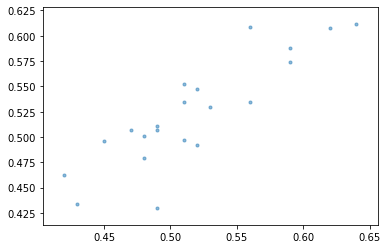

In [28]:
#code credit to: https://pythonspot.com/matplotlib-scatterplot/
import numpy as np
import matplotlib.pyplot as plt
x = pollWinner #can adjust x and y as needed
y = actualWinner
area = np.pi*3
plt.scatter(x, y, s=area, alpha=0.5)

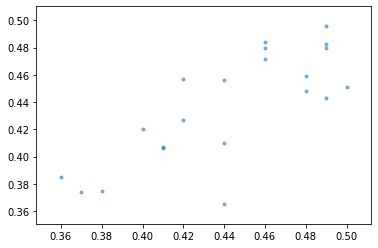

In [29]:
x = pollLoser #can adjust x and y as needed
y = actualLoser
area = np.pi*3
plt.scatter(x, y, s=area, alpha=0.5)